#Two time correlation example using NIPA_GEL_250K data 

In [1]:
import numpy as np

%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.patches as mp

import skxray.correlation as corr
import skxray.roi as roi

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


## Get the image data

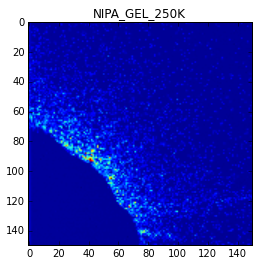

In [2]:
img_stack = np.load("100_500_NIPA_GEL.npy")

img_it = np.nditer(img_stack)

plt.imshow(img_stack[0])
plt.title("NIPA_GEL_250K")
plt.show()

## Create the region of intersets, rings

In [3]:
q_start = 65
q_width = 9
step_q = (5.0, 4.0, 3.0, 5.0)
x_center = 7.
y_center = (129.)
num_qs = 5

# get the edges of the rings
edges = roi.ring_edges(q_start, width=q_width, spacing=step_q,
                         num_rings=num_qs)
# get the label array from the ring shaped 3 region of interests(ROI's)
all_qinds = roi.rings(edges, (y_center, x_center), img_stack.shape[1:])

# extarct the ROI's lables and pixel indices corresponding to those labels
q_inds, pixel_list = corr.extract_label_indices(all_qinds)

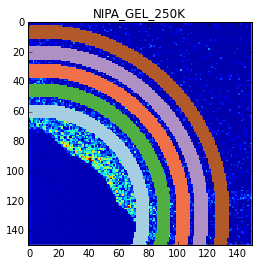

In [11]:
def test_demo(ax, inds, pix_list, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """
    tt = np.zeros(img_dim).ravel() * np.nan
    tt[pix_list] = inds

    im = ax.imshow(image, interpolation='none', norm=LogNorm())
    im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', interpolation='nearest')
    
fig, ax = plt.subplots()
plt.title("NIPA_GEL_250K")
test_demo(ax, q_inds, pixel_list, img_stack.shape[1:], img_stack[0])
plt.show()

##Get the mask file

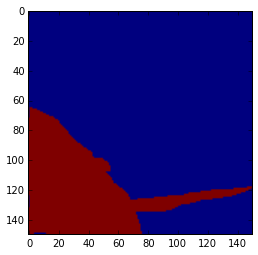

In [6]:
mask_nipa=np.load("mask_NIPA_GEL.npy")
plt.imshow(mask_nipa)
plt.show()

## Get the new labels after masking

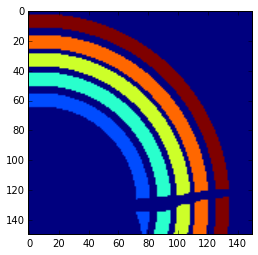

In [8]:
new_labels = all_qinds*~mask_nipa

plt.imshow(new_labels)
plt.show()

## Use the Multi tau scheme for two time correlation

In [12]:
num_levels = 7
num_bufs = 8

two_time_c = corr.two_time_corr(num_levels, num_bufs, new_labels, img_it)

In [13]:
two_time_c.shape

(500, 500, 5)

In [19]:
# Plotting the Two time correlation results

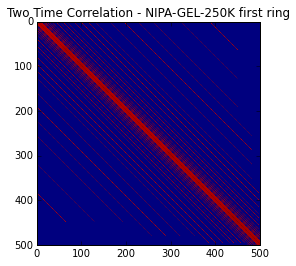

In [20]:
plt.imshow(two_time_c[:,:,0])
plt.title("Two Time Correlation - NIPA-GEL-250K first ring")
plt.show()

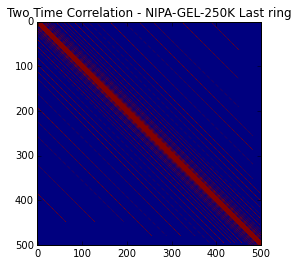

In [21]:
plt.imshow(two_time_c[:,:,4])
plt.title("Two Time Correlation - NIPA-GEL-250K Last ring")
plt.show()

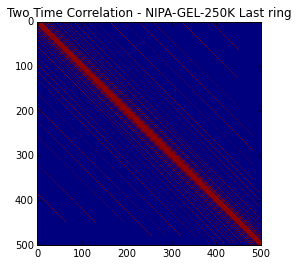

In [22]:
plt.imshow(two_time_c[:, :, 2])
plt.title("Two Time Correlation - NIPA-GEL-250K Last ring")
plt.show()